In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Set seed - M24CSE029
np.random.seed(29)

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data Shape
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


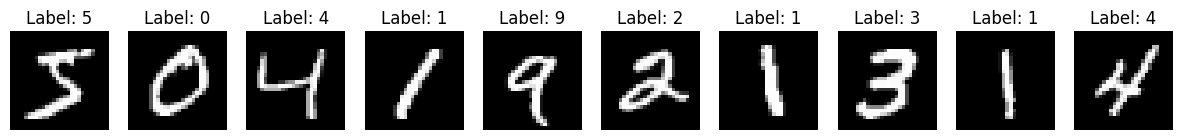

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis('off')
plt.show()

In [ ]:
# Normalize the images to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images for the feedforward NN
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# One-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    encoded = np.zeros((labels.size, num_classes))
    encoded[np.arange(labels.size), labels] = 1
    return encoded

train_labels = one_hot_encode(train_labels)
test_labels = one_hot_encode(test_labels)

# Print shapes after preprocessing
print("Shape of training images after flattening:", train_images.shape)
print("Shape of test images after flattening:", test_images.shape)
print("Shape of training labels after encoding:", train_labels.shape)
print("Shape of test labels after encoding:", test_labels.shape)


Shape of training images after flattening: (60000, 784)
Shape of test images after flattening: (10000, 784)
Shape of training labels after encoding: (60000, 10)
Shape of test labels after encoding: (10000, 10)


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, activation="relu", seed=1):
        np.random.seed(seed)
        self.layers = []
        self.activation_function = self.relu if activation == "relu" else self.elu

        # Initialize weights and biases for input to first hidden layer
        self.layers.append({
            'weights': np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2 / input_size),
            'biases': np.ones((1, hidden_sizes[0]))
        })

        # Initialize weights and biases for hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append({
                'weights': np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * np.sqrt(2 / hidden_sizes[i-1]),
                'biases': np.ones((1, hidden_sizes[i]))
            })

        # Initialize weights and biases for hidden to output layer
        self.layers.append({
            'weights': np.random.randn(hidden_sizes[-1], output_size) * np.sqrt(2 / hidden_sizes[-1]),
            'biases': np.ones((1, output_size))
        })

    def forward(self, X):
        activations = [X]
        for i, layer in enumerate(self.layers[:-1]):
            Z = np.dot(activations[-1], layer['weights']) + layer['biases']
            A = self.activation_function(Z)
            activations.append(A)

        # Output layer with softmax activation
        Z = np.dot(activations[-1], self.layers[-1]['weights']) + self.layers[-1]['biases']
        A = self.softmax(Z)
        activations.append(A)
        return activations

    @staticmethod
    def relu(Z):
        return np.maximum(0, Z)

    @staticmethod
    def elu(Z, alpha=1.0):
        return np.where(Z > 0, Z, alpha * (np.exp(Z) - 1))

    @staticmethod
    def softmax(Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    @staticmethod
    def cross_entropy_loss(y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss

    def backward(self, activations, y_true):
        gradients = []
        m = y_true.shape[0]

        # Compute gradient for output layer
        dZ = activations[-1] - y_true
        dW = np.dot(activations[-2].T, dZ) / m
        dB = np.sum(dZ, axis=0, keepdims=True) / m
        gradients.append({'dW': dW, 'dB': dB})

        # Backpropagate through hidden layers
        for i in range(len(self.layers) - 2, -1, -1):
            dZ = np.dot(dZ, self.layers[i + 1]['weights'].T) * (activations[i + 1] > 0)
            dW = np.dot(activations[i].T, dZ) / m
            dB = np.sum(dZ, axis=0, keepdims=True) / m
            gradients.append({'dW': dW, 'dB': dB})

        # Reverse gradients to match layer order
        gradients = gradients[::-1]
        return gradients

    def update_parameters(self, gradients, learning_rate):
        for i, grad in enumerate(gradients):
            self.layers[i]['weights'] -= learning_rate * grad['dW']
            self.layers[i]['biases'] -= learning_rate * grad['dB']

    def count_parameters(self):
        total_params = 0
        for layer in self.layers:
            total_params += np.prod(layer['weights'].shape) + np.prod(layer['biases'].shape)
        return total_params

    def predict(self, X):
        activations = self.forward(X)
        return np.argmax(activations[-1], axis=1)

In [ ]:
# Example initialization
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

Training with relu activation
Epoch 1/25 - Train Loss: 0.4483, Val Loss: 0.3243, Train Acc: 0.9073, Val Acc: 0.9059
Epoch 2/25 - Train Loss: 0.2666, Val Loss: 0.2902, Train Acc: 0.9163, Val Acc: 0.9143
Epoch 3/25 - Train Loss: 0.0953, Val Loss: 0.2477, Train Acc: 0.9317, Val Acc: 0.9272
Epoch 4/25 - Train Loss: 0.0962, Val Loss: 0.2199, Train Acc: 0.9424, Val Acc: 0.9371
Epoch 5/25 - Train Loss: 0.1739, Val Loss: 0.1983, Train Acc: 0.9500, Val Acc: 0.9446
Epoch 6/25 - Train Loss: 0.2213, Val Loss: 0.1861, Train Acc: 0.9548, Val Acc: 0.9463
Epoch 7/25 - Train Loss: 0.0469, Val Loss: 0.1738, Train Acc: 0.9586, Val Acc: 0.9503
Epoch 8/25 - Train Loss: 0.1905, Val Loss: 0.1621, Train Acc: 0.9623, Val Acc: 0.9540
Epoch 9/25 - Train Loss: 0.2203, Val Loss: 0.1559, Train Acc: 0.9660, Val Acc: 0.9562
Epoch 10/25 - Train Loss: 0.0457, Val Loss: 0.1487, Train Acc: 0.9684, Val Acc: 0.9574
Epoch 11/25 - Train Loss: 0.4387, Val Loss: 0.1415, Train Acc: 0.9715, Val Acc: 0.9598
Epoch 12/25 - Train Lo

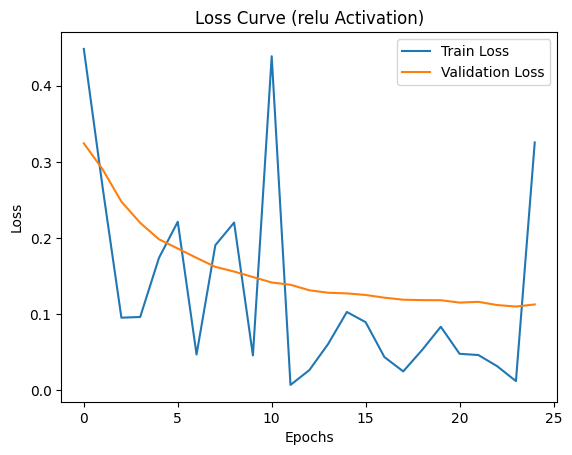

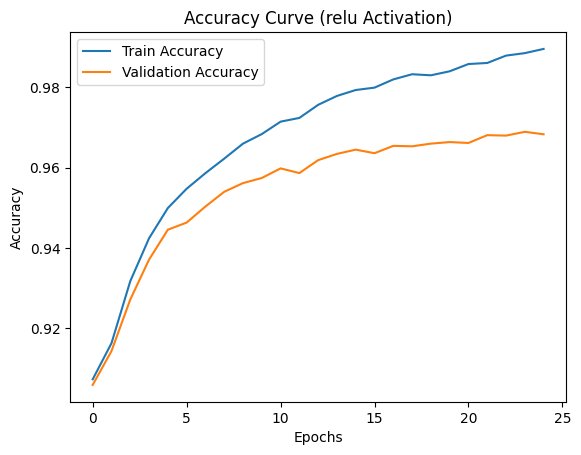

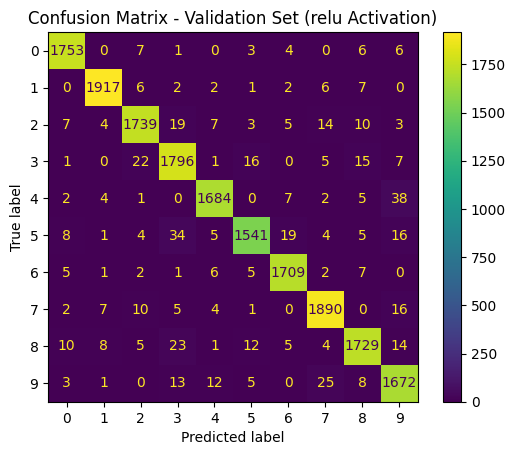

Test Accuracy with relu activation: 0.9722


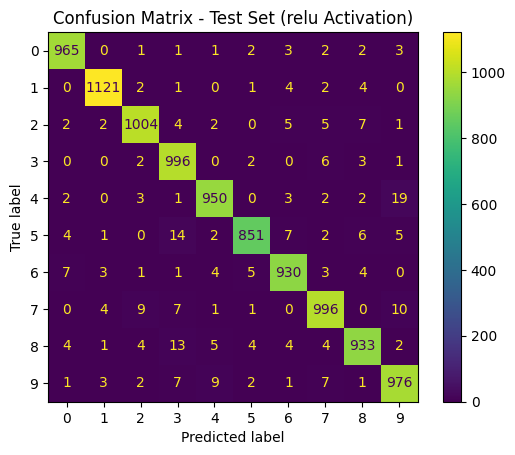

Training with elu activation
Epoch 1/25 - Train Loss: 0.4439, Val Loss: 0.3348, Train Acc: 0.9036, Val Acc: 0.9024
Epoch 2/25 - Train Loss: 0.2760, Val Loss: 0.3057, Train Acc: 0.9113, Val Acc: 0.9110
Epoch 3/25 - Train Loss: 0.1197, Val Loss: 0.2663, Train Acc: 0.9261, Val Acc: 0.9225
Epoch 4/25 - Train Loss: 0.0977, Val Loss: 0.2393, Train Acc: 0.9370, Val Acc: 0.9333
Epoch 5/25 - Train Loss: 0.1787, Val Loss: 0.2166, Train Acc: 0.9442, Val Acc: 0.9387
Epoch 6/25 - Train Loss: 0.2717, Val Loss: 0.2041, Train Acc: 0.9487, Val Acc: 0.9424
Epoch 7/25 - Train Loss: 0.0426, Val Loss: 0.1882, Train Acc: 0.9534, Val Acc: 0.9469
Epoch 8/25 - Train Loss: 0.2124, Val Loss: 0.1753, Train Acc: 0.9569, Val Acc: 0.9507
Epoch 9/25 - Train Loss: 0.2619, Val Loss: 0.1672, Train Acc: 0.9605, Val Acc: 0.9520
Epoch 10/25 - Train Loss: 0.0666, Val Loss: 0.1599, Train Acc: 0.9629, Val Acc: 0.9539
Epoch 11/25 - Train Loss: 0.5197, Val Loss: 0.1524, Train Acc: 0.9656, Val Acc: 0.9563
Epoch 12/25 - Train Los

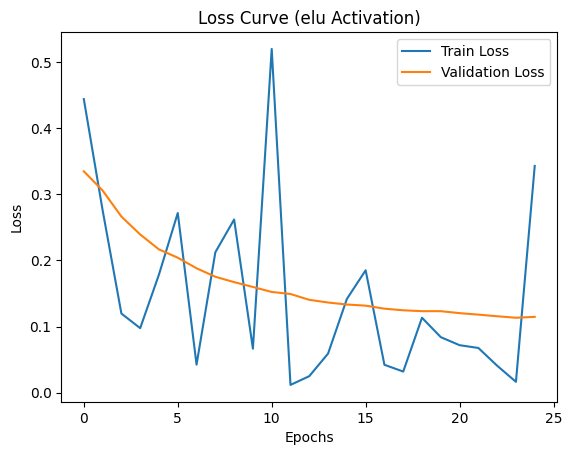

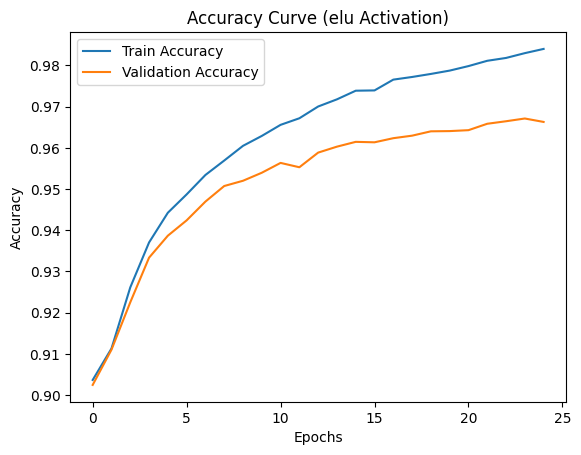

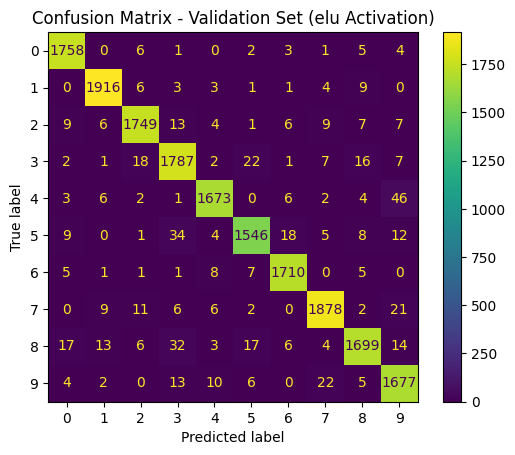

Test Accuracy with elu activation: 0.9718


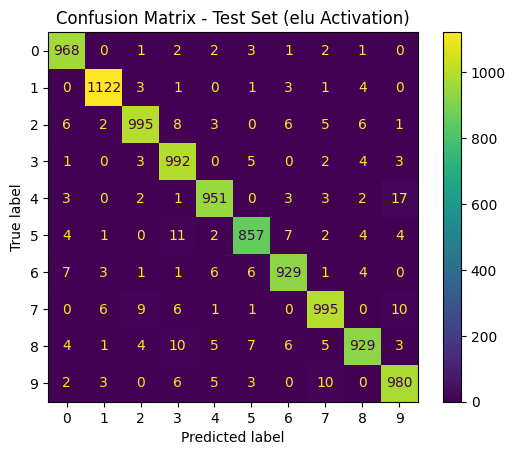

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for activation_function in ["relu", "elu"]:
    print(f"Training with {activation_function} activation")
    nn = NeuralNetwork(input_size, hidden_sizes, output_size, activation=activation_function)

    # Training loop
    train_split_ratio = np.random.choice([0.7, 0.8, 0.9])
    num_epochs = 25
    learning_rate = 0.01
    batch_size = 24 # M24CSE029

    # Single randomized split
    split_idx = int(train_images.shape[0] * train_split_ratio)
    X_train, X_val = train_images[:split_idx], train_images[split_idx:]
    y_train, y_val = train_labels[:split_idx], train_labels[split_idx:]

    train_loss_history = []
    val_loss_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    for epoch in range(num_epochs):
        # Shuffle training data
        perm = np.random.permutation(X_train.shape[0])
        X_train = X_train[perm]
        y_train = y_train[perm]

        # Mini-batch training
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            # Forward pass
            activations = nn.forward(X_batch)

            # Compute loss
            train_loss = nn.cross_entropy_loss(y_batch, activations[-1])

            # Backward pass
            gradients = nn.backward(activations, y_batch)

            # Update parameters
            nn.update_parameters(gradients, learning_rate)

        # End of epoch evaluation
        train_loss_history.append(train_loss)
        train_preds = nn.predict(X_train)
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_preds)
        train_accuracy_history.append(train_accuracy)

        val_activations = nn.forward(X_val)
        val_loss = nn.cross_entropy_loss(y_val, val_activations[-1])
        val_loss_history.append(val_loss)
        val_preds = nn.predict(X_val)
        val_accuracy = np.mean(np.argmax(y_val, axis=1) == val_preds)
        val_accuracy_history.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Plot loss and accuracy curves
    plt.figure()
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.title(f"Loss Curve ({activation_function} Activation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(train_accuracy_history, label='Train Accuracy')
    plt.plot(val_accuracy_history, label='Validation Accuracy')
    plt.title(f"Accuracy Curve ({activation_function} Activation)")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Confusion matrix for validation data
    val_preds = nn.predict(X_val)
    val_true = np.argmax(y_val, axis=1)
    conf_matrix = confusion_matrix(val_true, val_preds)
    ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10)).plot(cmap='viridis')
    plt.title(f"Confusion Matrix - Validation Set ({activation_function} Activation)")
    plt.show()

    # Evaluate on test set
    test_preds = nn.predict(test_images)
    test_true = np.argmax(test_labels, axis=1)
    test_accuracy = np.mean(test_preds == test_true)
    print(f"Test Accuracy with {activation_function} activation: {test_accuracy:.4f}")

    # Confusion matrix for test data
    test_conf_matrix = confusion_matrix(test_true, test_preds)
    ConfusionMatrixDisplay(test_conf_matrix, display_labels=np.arange(10)).plot(cmap='viridis')
    plt.title(f"Confusion Matrix - Test Set ({activation_function} Activation)")
    plt.show()